In [1]:
#Loading the Reuters dataset
#The data is stored as an array of lists of integers
#Every list is an example of a newswire, encoded in integers, i.e. a map integers to words
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [23]:
#Decoding newswire back into text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decoded(x): #function for translating the newswires back into text
    print(' '.join([reverse_word_index.get(i-3, '?') for i in train_data[x]]))

7511

In [3]:
#Vectorize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
#vectorize the labels
#there are two possibilities
#we use one-hot encoding, i.e. we embed each label as an all-zero vector with 1 in the place of the label index
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#we could do this also with a built-in way from Keras:
#from keras.utils.np_utils import to_categorical

#one_hot_train_labels1 = to_categorical(train_labels)
#one_hot_test_labels2 = to_categorical(test_labels)

In [5]:
#Defining the model
#We use 64 hidden layers, since 16 could be to limited to learn to seperate 46 different classes
#i.e. information could get lost
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
#we end the network with a Dense layer of size 46, i.e. for each input sample we get a 46dim vector
#each dimension will encode a different output class
#softmax activation will lead to a output of a probability distribution
#each dimension i of the output vector gives us the probability that the sample belongs to class i

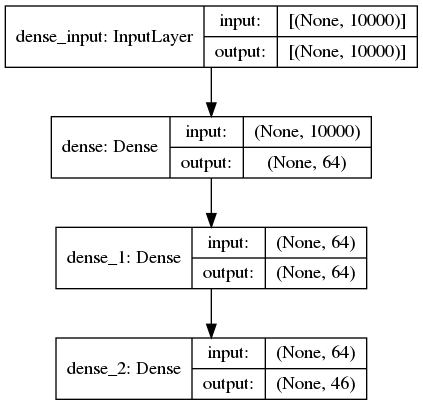

In [29]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

plot_model(model, to_file='model.png', show_shapes=True)

In [6]:
#compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [7]:
#setting a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
#training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 181us/sample - loss: 2.6964 - acc: 0.5202 - val_loss: 1.7559 - val_acc: 0.6620
Epoch 2/20
7982/7982 [==============================] - 1s 132us/sample - loss: 1.4036 - acc: 0.7249 - val_loss: 1.2749 - val_acc: 0.7390
Epoch 3/20
7982/7982 [==============================] - 1s 133us/sample - loss: 1.0161 - acc: 0.7889 - val_loss: 1.1046 - val_acc: 0.7680
Epoch 4/20
7982/7982 [==============================] - 1s 133us/sample - loss: 0.7950 - acc: 0.8345 - val_loss: 1.0231 - val_acc: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 135us/sample - loss: 0.6310 - acc: 0.8687 - val_loss: 0.9410 - val_acc: 0.8150
Epoch 6/20
7982/7982 [==============================] - 1s 133us/sample - loss: 0.5057 - acc: 0.8963 - val_loss: 0.9124 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 1s 134us/sample - loss: 0.4086 - acc: 0.9156 - val_loss: 0.9155 - va

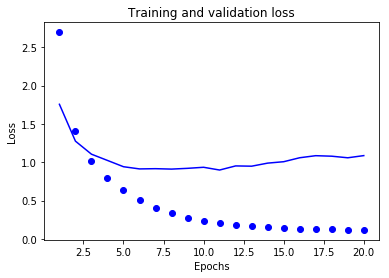

In [26]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

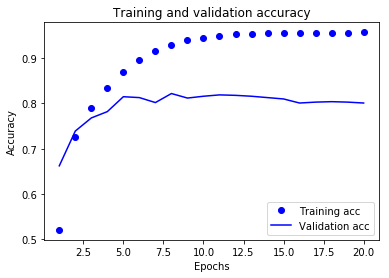

In [28]:
#plotting the training and validation accuracy
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [72]:
#Retraining a model from scratch with less epochs, avoiding overfit
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history1 = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 160us/sample - loss: 2.8004 - acc: 0.4629 - val_loss: 1.8114 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 123us/sample - loss: 1.4506 - acc: 0.7150 - val_loss: 1.2971 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 130us/sample - loss: 1.0562 - acc: 0.7790 - val_loss: 1.1187 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 131us/sample - loss: 0.8259 - acc: 0.8225 - val_loss: 1.0103 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 1s 126us/sample - loss: 0.6578 - acc: 0.8573 - val_loss: 0.9503 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s 123us/sample - loss: 0.5302 - acc: 0.8875 - val_loss: 0.9203 - val_acc: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 120us/sample - loss: 0.4261 - acc: 0.9103 - val_loss: 0.8966 - val_acc: 

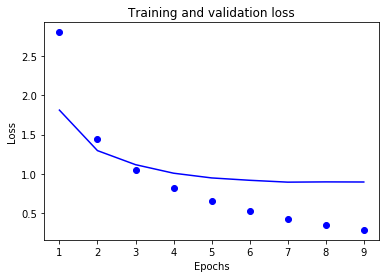

In [73]:
#plotting the training and validation loss of the retrained model
import matplotlib.pyplot as plt

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

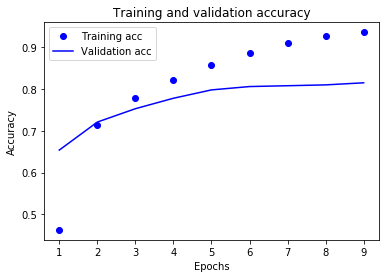

In [74]:
#plotting the training and validation accuracy of the retrained model
plt.clf()

acc = history1.history['acc']
val_acc = history1.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [71]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 137us/sample - loss: 1.0000 - acc: 0.7850
